In [1]:
import YahooFinance as yp
import matplotlib 
%matplotlib notebook
%matplotlib inline
import pandas as pd
import datetime 

In [14]:
yahoo = yp.YahooFinance()
dfx = yahoo.get_historical("QQQ", "1970/01/01")

<RequestsCookieJar[<Cookie B=7u64gq5f5koaa&b=3&s=53 for .yahoo.com/>]>
mTCWsCDU1aw <RequestsCookieJar[<Cookie B=7u64gq5f5koaa&b=3&s=53 for .yahoo.com/>]>
https://query1.finance.yahoo.com/v7/finance/download/QQQ?period1=0&period2=1582963451&interval=1d&events=history&crumb=mTCWsCDU1aw


In [16]:
dfx = yahoo.get_historical("GOOG", "1970/01/01")
dfx_div = yahoo.get_historical_div("TQQQ", "1970/01/01")
dfx_split = yahoo.get_historical_split("TQQQ", "1970/01/01")
dfx_div_qqq = yahoo.get_historical_div("QQQ", "1970/01/01")

https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=0&period2=1582963500&interval=1d&events=history&crumb=mTCWsCDU1aw
https://query1.finance.yahoo.com/v7/finance/download/TQQQ?period1=0&period2=1582963500&interval=1d&events=div&crumb=mTCWsCDU1aw
https://query1.finance.yahoo.com/v7/finance/download/TQQQ?period1=0&period2=1582963500&interval=1d&events=split    &crumb=mTCWsCDU1aw
https://query1.finance.yahoo.com/v7/finance/download/QQQ?period1=0&period2=1582963501&interval=1d&events=div&crumb=mTCWsCDU1aw


In [6]:
dfx_split

#pd.concat([dfx_div_qqq, dfx_div], axis=1)


,Date,Stock Splits,Symbol
0,2014-01-24,2:1,TQQQ
1,2012-05-11,2:1,TQQQ
2,2018-05-24,3:1,TQQQ
3,2011-02-25,2:1,TQQQ
4,2017-01-12,2:1,TQQQ


25.746611276643684
384.80861443323766


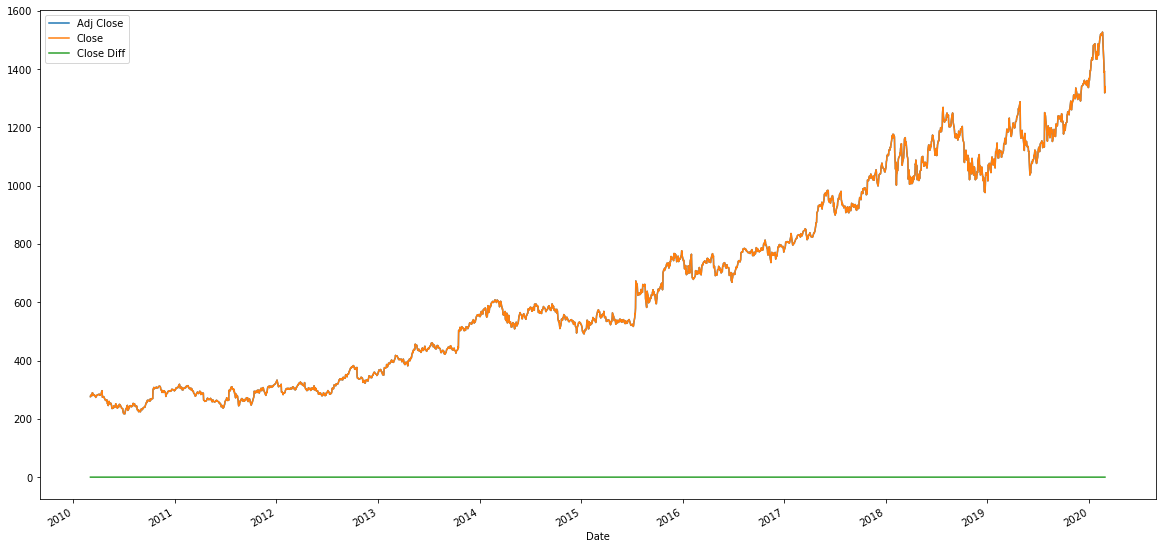

In [33]:
df = dfx

df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

df = df.loc[df.index > pd.to_datetime(datetime.datetime.now()) - pd.Timedelta(str(10*365) + " days")]
#df['Adj Close'] = df['Adj Close'] *3
df.loc[:, 'prev']= df["Adj Close"].shift().bfill()
df.loc[:, 'ret'] = 1 + (df['Adj Close'] - df.prev)/df.prev
df.loc[:, 'cumret'] = df.ret.cumprod()
df.loc[:, 'Close Diff'] = df.Close - df['Adj Close']
df[['Adj Close', 'Close', 'Close Diff']].plot(figsize=(20,10))
print(((df.ret.prod() ** (365/df.shape[0])) - 1)*100)
print(((df.ret.prod() ** (df.shape[0]/df.shape[0])) - 1)*100)
#df
